In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data.txt', delimiter=';')

In [4]:
df.head()

,Name,Disp.energy,Rep.,2000,1674,1408,1184,995.5,837.1,703.9,...,0.061,0.051,0.043,0.036,0.03,0.0255,0.0215,0.0181,0.0152,0.0128
0,Podzol_E,65,1,0.0,0.0,0.0,0.00,0.01,0.09,0.12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Podzol_E,130,1,0.0,0.0,0.0,0.00,0.00,0.00,0.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Podzol_E,194,1,0.0,0.0,0.0,0.01,0.07,0.09,0.13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Podzol_E,259,1,0.0,0.0,0.0,0.00,0.01,0.07,0.10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Podzol_E,324,1,0.0,0.0,0.0,0.01,0.08,0.09,0.13,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.shape

(216, 73)

In [6]:
df['Rep.'].value_counts()

1    216
Name: Rep., dtype: int64

In [7]:
df['Name'].value_counts()

Der-Podz_P          12
Vert_A              12
Slitaya_AEL         12
Slitaya_BT1         12
Ferr_B1             12
Slitaya_AY          12
Der-Podz_BT1        12
Podzol_BHFi         12
Ferr_B2             12
Der-Podz_EL         12
Ferr_A              12
Podzolistaya_Eh1    12
Podzolistaya_ELe    12
Chernozem_B         12
Chernozem_AY        12
Vert_Aspot          12
Chernozem_Aca       12
Podzol_E            12
Name: Name, dtype: int64

In [8]:
df['Disp.energy'].value_counts()

971     18
712     18
453     18
194     18
389     18
130     18
1101    18
842     18
583     18
324     18
65      18
259     18
Name: Disp.energy, dtype: int64

In [9]:
dummy_soil_types = pd.get_dummies(df['Name'], drop_first=True)

In [10]:
df_dummies = pd.concat([df, dummy_soil_types], axis=1)

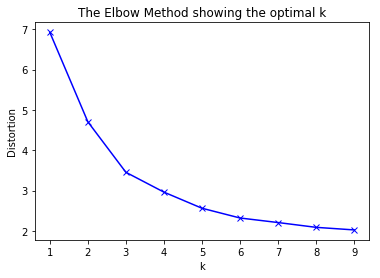

In [157]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_dummies.drop(['Name', 'Disp.energy'], axis=1))
    kmeanModel.fit(df_dummies.drop(['Name', 'Disp.energy'], axis=1))
    distortions.append(sum(np.min(cdist(df_dummies.drop(['Name', 'Disp.energy'], axis=1), 
                                        kmeanModel.cluster_centers_, 'euclidean'), 
                                  axis=1)) / df_dummies.drop(['Name', 'Disp.energy'], axis=1).shape[0])


plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [12]:
# Кластеризация K-means.
from sklearn.cluster import KMeans

numb_clusters = 2

km = KMeans(n_clusters=numb_clusters)

km.fit(df_dummies.drop(['Name', 'Disp.energy'], axis=1))

clusters = km.labels_.tolist()

In [13]:
clusterized_df = df
clusterized_df['Cluster'] = clusters

In [14]:
clusterized_df['Cluster'].value_counts()

0    157
1     59
Name: Cluster, dtype: int64

In [158]:
clusterized_df[['Name', 'Disp.energy', 'Cluster']].groupby(['Name'])['Cluster'].sum()

Name
Chernozem_AY         0
Chernozem_Aca        0
Chernozem_B          0
Der-Podz_BT1         0
Der-Podz_EL          0
Der-Podz_P           0
Ferr_A              11
Ferr_B1             12
Ferr_B2             12
Podzol_BHFi          0
Podzol_E             0
Podzolistaya_ELe     0
Podzolistaya_Eh1     0
Slitaya_AEL          0
Slitaya_AY           0
Slitaya_BT1          0
Vert_A              12
Vert_Aspot          12
Name: Cluster, dtype: int64

In [15]:
clusterized_df[['Name', 'Disp.energy', 'Cluster']]

,Name,Disp.energy,Cluster
0,Podzol_E,65,0
1,Podzol_E,130,0
2,Podzol_E,194,0
3,Podzol_E,259,0
4,Podzol_E,324,0
5,Podzol_E,389,0
6,Podzol_E,453,0
7,Podzol_E,583,0
8,Podzol_E,712,0
9,Podzol_E,842,0


In [16]:
soils = list(set(df['Name'].values))

In [17]:
flattened_df = pd.DataFrame()
for soil in soils:
    appending_ls = [soil] + list(df[df['Name'] == soil].drop(['Name', 'Disp.energy', 'Rep.', 'Cluster'], 
                                                             axis=1).values.flatten())
    flattened_df = flattened_df.append([appending_ls])

In [18]:
flattened_df

,0,1,2,3,4,5,6,7,8,9,...,831,832,833,834,835,836,837,838,839,840
0,Podzol_E,0.0,0.000000,0.000000,0.000000,0.010000,0.090000,0.120000,0.240000,0.340000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
0,Slitaya_AEL,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.090000,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
0,Chernozem_B,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.080000,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
0,Ferr_A,0.0,0.000000,0.000000,0.000000,0.006667,0.043333,0.060000,0.106667,0.126667,...,0.433333,0.353333,0.273333,0.216667,0.163333,0.12,0.083333,0.056667,0.036667,0.023333
0,Vert_A,0.0,0.000000,0.010000,0.070000,0.120000,0.130000,0.160000,0.240000,0.280000,...,0.070000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
0,Vert_Aspot,0.0,0.000000,0.010000,0.070000,0.130000,0.150000,0.180000,0.270000,0.300000,...,0.070000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
0,Slitaya_BT1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,0.070000,0.090000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
0,Slitaya_AY,0.0,0.006667,0.043333,0.066667,0.120000,0.126667,0.136667,0.203333,0.223333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
0,Podzol_BHFi,0.0,0.000000,0.000000,0.010000,0.100000,0.170000,0.290000,0.560000,0.860000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
0,Chernozem_AY,0.0,0.006667,0.043333,0.066667,0.123333,0.130000,0.150000,0.220000,0.256667,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000


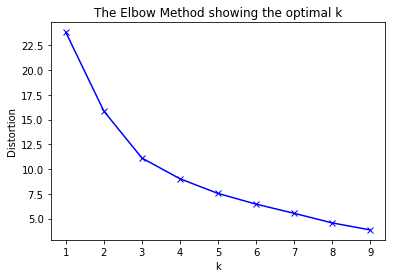

In [19]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(flattened_df.drop(0, axis=1))
    kmeanModel.fit(flattened_df.drop(0, axis=1))
    distortions.append(sum(np.min(cdist(flattened_df.drop(0, axis=1), kmeanModel.cluster_centers_, 'euclidean'), 
                                  axis=1)) / flattened_df.drop(0, axis=1).shape[0])


plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [20]:
# Кластеризация K-means.
from sklearn.cluster import KMeans

numb_clusters = 2

km = KMeans(n_clusters=numb_clusters)

km.fit(flattened_df.drop(0, axis=1))

clusters = km.labels_.tolist()

In [21]:
clusterized_flattened_df = flattened_df
clusterized_flattened_df['Cluster'] = clusters

In [22]:
clusterized_flattened_df[[0, 'Cluster']]

,0,Cluster
0,Podzol_E,0
0,Slitaya_AEL,0
0,Chernozem_B,0
0,Ferr_A,1
0,Vert_A,1
0,Vert_Aspot,1
0,Slitaya_BT1,0
0,Slitaya_AY,0
0,Podzol_BHFi,0
0,Chernozem_AY,0


In [23]:
# Расстояния для кластеризации.
from sklearn.metrics.pairwise import cosine_similarity

distance = 1 - cosine_similarity(df_dummies.drop(['Name', 'Disp.energy'], axis=1))

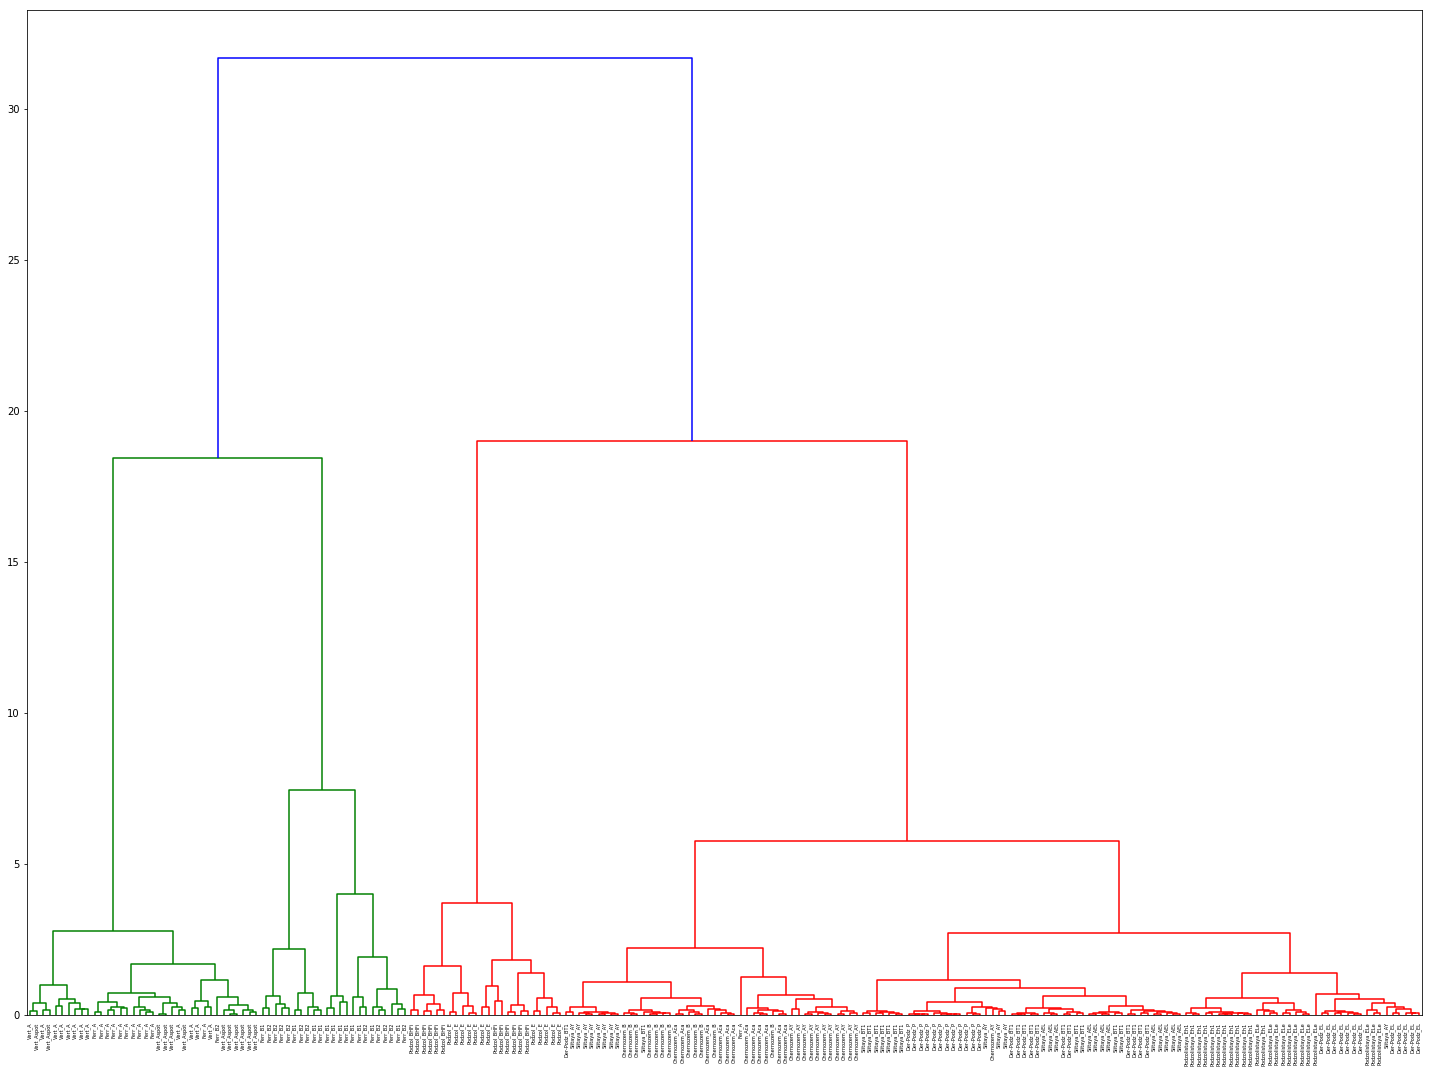

In [93]:
# Иерархическая кластеризация.
from scipy.cluster.hierarchy import ward, dendrogram

linkage = ward(distance) 

fig, ax = plt.subplots(figsize=(20, 15))
'''ax = dendrogram(linkage, labels=list(df_dummies['Name']), 
                orientation='right', truncate_mode='lastp',
                p=18, show_leaf_counts=True);
'''

ax = dendrogram(linkage, labels=list(df_dummies['Name']))

plt.tick_params(\
    axis= 'x',          
    which='both',     
    bottom='off',      
    top='off',         
    labelbottom='on')

plt.tight_layout()

In [176]:
from scipy.cluster.hierarchy import fcluster

hierarch_clusters = fcluster(linkage, 20, criterion='distance')

In [179]:
clusterized_df['H_Cluster'] = hierarch_clusters
clusterized_df['H_Cluster'].replace(2, 0, inplace=True)

In [193]:
from IPython.display import display, HTML
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

multi_table([clusterized_df.groupby(['Name'])['H_Cluster', 'Cluster'].sum(), clusterized_flattened_df[[0, 'Cluster']]])


,H_Cluster,Cluster
Name,,
Chernozem_AY,0,0
Chernozem_Aca,0,0
Chernozem_B,0,0
Der-Podz_BT1,0,0
Der-Podz_EL,0,0
Der-Podz_P,0,0
Ferr_A,11,11
Ferr_B1,12,12
Ferr_B2,12,12
